# Occupation

### Introduction:

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
%matplotlib inline
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

### Step 3. Assign it to a variable called users.

In [2]:
users = pd.read_csv('./u.user', delimiter='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Step 4. Discover what is the mean age per occupation

In [3]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [4]:
# NOTE: Wasn't able to solve this by myself. So I copied the answer for future reference

# create a function
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

# apply the function to the gender column and create a new column
users['gender_n'] = users['gender'].apply(gender_to_numeric)
users.head()

,user_id,age,gender,occupation,zip_code,gender_n
0,1,24,M,technician,85711,1
1,2,53,F,other,94043,0
2,3,23,M,writer,32067,1
3,4,24,M,technician,43537,1
4,5,33,F,other,15213,0


In [5]:
a = (users.groupby('occupation').gender_n.sum() / users.occupation.value_counts()) * 100 
a

administrator     54.430380
artist            53.571429
doctor           100.000000
educator          72.631579
engineer          97.014925
entertainment     88.888889
executive         90.625000
healthcare        31.250000
homemaker         14.285714
lawyer            83.333333
librarian         43.137255
marketing         61.538462
none              55.555556
other             65.714286
programmer        90.909091
retired           92.857143
salesman          75.000000
scientist         90.322581
student           69.387755
technician        96.296296
writer            57.777778
dtype: float64

In [6]:
# sort to the most male 
a.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

### Step 6. For each occupation, calculate the minimum and maximum ages

In [7]:
min_and_max_ages = users.groupby('occupation').age.agg(['min', 'max'])
min_and_max_ages

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


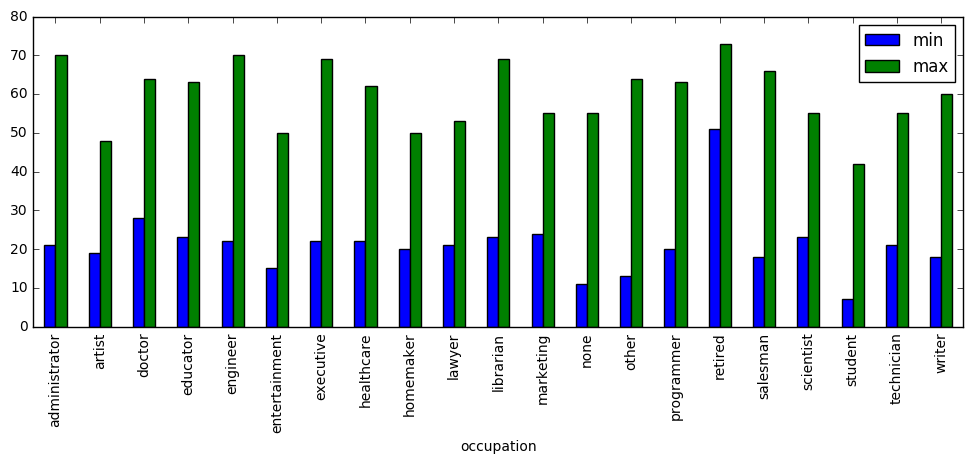

In [8]:
min_and_max_ages.plot(kind='bar', figsize=(12, 4))

### Step 7. For each combination of occupation and gender, calculate the mean age

In [9]:
occupation_age_mean = users.groupby(['occupation', 'gender']).age.mean()
occupation_age_mean

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

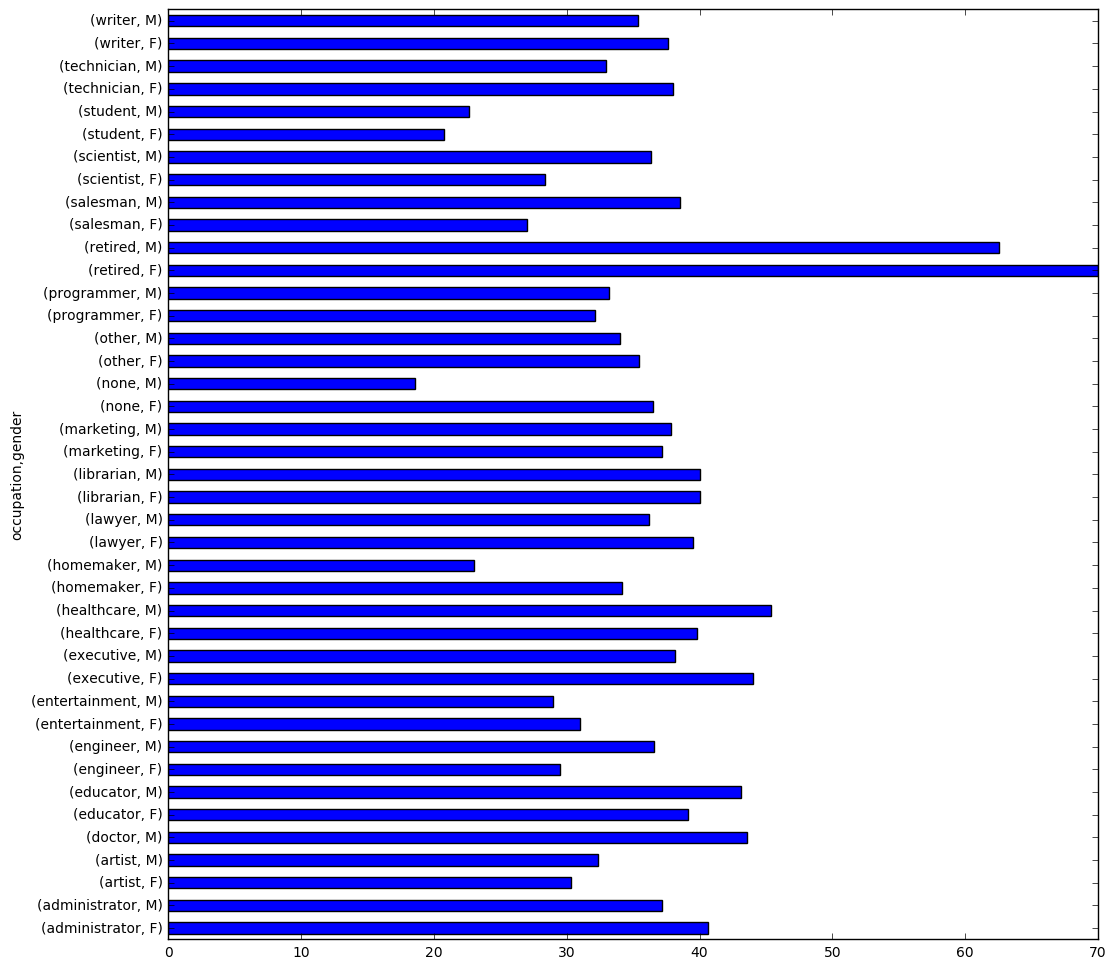

In [10]:
occupation_age_mean.plot(kind='barh', figsize=(12, 12))

### Step 8.  For each occupation present the percentage of women and men

In [12]:
# NOTE: Wasn't able to solve this by myself. So I copied the answer for future reference

# create a data frame and apply count to gender
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
gender_ocup.head()

gender
occupation    gender        
administrator F           36
              M           43
artist        F           13
              M           15
doctor        M            7

In [13]:
# create a DataFrame and apply count for each occupation
occup_count = users.groupby(['occupation']).agg('count')
occup_count

,user_id,age,gender,zip_code,gender_n
occupation,,,,,
administrator,79,79,79,79,79
artist,28,28,28,28,28
doctor,7,7,7,7,7
educator,95,95,95,95,95
engineer,67,67,67,67,67
entertainment,18,18,18,18,18
executive,32,32,32,32,32
healthcare,16,16,16,16,16
homemaker,7,7,7,7,7


In [16]:
# divide the gender_ocup per the occup_count and multiply per 100
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100
occup_gender.head()

age      gender  gender_n  user_id  zip_code
occupation    gender                                              
administrator F       NaN   45.569620       NaN      NaN       NaN
              M       NaN   54.430380       NaN      NaN       NaN
artist        F       NaN   46.428571       NaN      NaN       NaN
              M       NaN   53.571429       NaN      NaN       NaN
doctor        M       NaN  100.000000       NaN      NaN       NaN

In [17]:
# present all rows from the 'gender column'
occup_gender.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra